Iteration: 6
Final lambda^2/2: 3.007750953536906e-08
min(x): 0.18267989422616748
max(x): 2.9074891095755593
KKT residual norm: 0.0009494185115102123


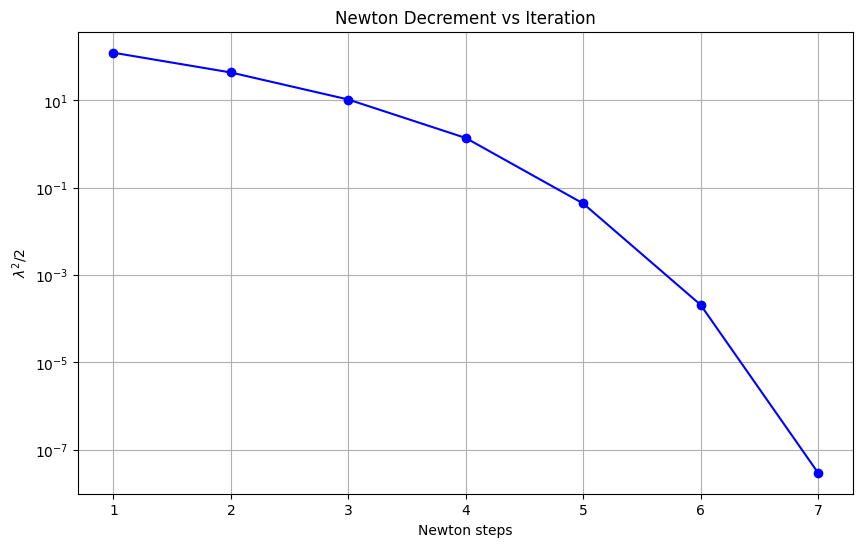

In [18]:
# additional exercises
# solving LP barrier method
# (1) Centering step

import numpy as np
import matplotlib.pyplot as plt

m = 100
n = 500
alpha = 0.01
beta = 0.5
tol = 1e-6
Maxiter = 100

np.random.seed(0)
A = np.vstack([np.random.randn(m-1, n), np.ones((1, n))])  # 마지막 행을 ones로
x = np.random.rand(n) + 0.1
b = A @ x
c = np.random.randn(n)


lambda_hist = []

i = 0
while i < Maxiter:
    g = c - 1/x
    H_inv = np.diag(x ** 2)
     
    AHA = A @ H_inv @ A.T
    AHG = A @ H_inv @ g
    w = - np.linalg.solve(AHA, AHG)
    dx = -H_inv @ (A.T @ w + g)
    
    # Stopping criteria
    lambsqr = -float(g.T @ dx)
    lambda_hist.append(lambsqr / 2)
    
    if lambsqr / 2 <= tol:
        break
    
    # Line search - first make sure x + t*dx is feasible
    t = 1.0
    while np.min(x + t*dx) <= 0:
        t *= beta
    
    # Backtracking line search with correct condition
    while f(x + t*dx) > f(x) + alpha * t * (g @ dx):
        t *= beta
        
    x = x + t*dx
    i += 1
    
print("Iteration:", i)
print("Final lambda^2/2:", lambda_hist[-1])
print("min(x):", np.min(x))
print("max(x):", np.max(x))

# KKT residual check
kkt_residual = A.T @ w + c - 1.0/x
print("KKT residual norm:", np.linalg.norm(kkt_residual))

# Plot
plt.figure(figsize=(10, 6))
plt.semilogy(range(1, len(lambda_hist)+1), lambda_hist, 'bo-')
plt.xlabel('Newton steps')
plt.ylabel('$\lambda^2/2$')
plt.title('Newton Decrement vs Iteration')
plt.grid(True)
plt.show()

Barrier iter 1: Newton steps = 7, gap = 5.000000e+02
Barrier iter 2: Newton steps = 9, gap = 2.500000e+01
Barrier iter 3: Newton steps = 10, gap = 1.250000e+00
Barrier iter 4: Newton steps = 13, gap = 6.250000e-02
Barrier iter 5: Newton steps = 7, gap = 3.125000e-03
Barrier iter 6: Newton steps = 5, gap = 1.562500e-04

Total centering steps: 6
Total Newton steps: 51
Optimal value: -414.750302
Final duality gap: 1.562500e-04
min(x): 6.563931e-08
max(x): 13.915521


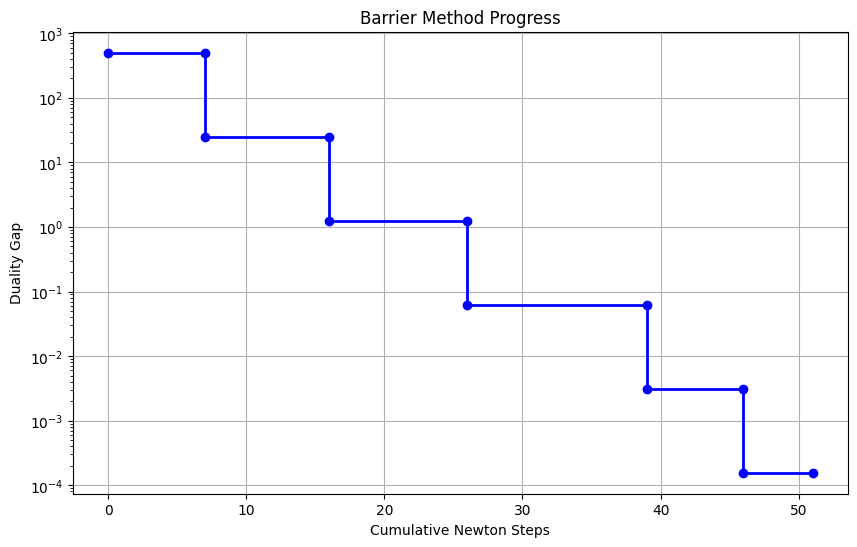

In [21]:
# additional exercises
# (2) LP solver with strictly feasible starting point.

import numpy as np
import matplotlib.pyplot as plt

m = 100
n = 500
alpha = 0.01
beta = 0.5
tol_acent = 1e-6
tol_barrier = 1e-3
Maxiter = 100

np.random.seed(0)
A = np.vstack([np.random.randn(m-1, n), np.ones((1, n))])
x = np.random.rand(n) + 0.1
b = A @ x
c = np.random.randn(n)

t = 1.0
mu = 20.0
history = []  # [newton_steps, duality_gap]

# Barrier method
barrier_iter = 0
while True:
    # Centering step
    c_barrier = t * c
    lambda_hist = []
    
    newton_iter = 0
    while newton_iter < Maxiter:
        g = c_barrier - 1/x
        H_inv = np.diag(x ** 2)
        
        AHA = A @ H_inv @ A.T
        AHG = A @ H_inv @ g
        w = -np.linalg.solve(AHA, AHG)
        dx = -H_inv @ (A.T @ w + g)
        
        # Stopping criteria
        lambsqr = -float(g.T @ dx)
        lambda_hist.append(lambsqr / 2)
        
        if lambsqr / 2 <= tol_acent:
            break
        
        # Line search 
        s = 1.0
        while np.min(x + s*dx) <= 0:
            s *= beta
        
        # line search
        while (c_barrier.T @ (s*dx) - np.sum(np.log(x + s*dx)) + 
               np.sum(np.log(x)) - alpha * s * (g.T @ dx) > 0):
            s *= beta
            
        x = x + s*dx
        newton_iter += 1
    
    # duality gap
    gap = n / t
    history.append([len(lambda_hist), gap])
    
    print(f"Barrier iter {barrier_iter+1}: Newton steps = {len(lambda_hist)}, gap = {gap:.6e}")
    
    # barrier stopping criteria
    if gap < tol_barrier:
        break
    
    t = mu * t
    barrier_iter += 1

# Results
history = np.array(history).T
p_star = c.T @ x

print("\n" + "="*60)
print(f"Total centering steps: {history.shape[1]}")
print(f"Total Newton steps: {int(np.sum(history[0, :]))}")
print(f"Optimal value: {p_star:.6f}")
print(f"Final duality gap: {gap:.6e}")
print(f"min(x): {np.min(x):.6e}")
print(f"max(x): {np.max(x):.6f}")
print("="*60)

# Plot barrier
plt.figure(figsize=(10, 6))
cumsum_steps = np.cumsum(history[0, :])
gaps = history[1, :]

# plot
xx = [0]
yy = [gaps[0]]
for i in range(len(cumsum_steps)):
    xx.append(cumsum_steps[i])
    yy.append(gaps[i])
    if i < len(cumsum_steps) - 1:
        xx.append(cumsum_steps[i])
        yy.append(gaps[i+1])

plt.semilogy(xx, yy, 'bo-', linewidth=2, markersize=6)
plt.xlabel('Cumulative Newton Steps')
plt.ylabel('Duality Gap')
plt.title('Barrier Method Progress')
plt.grid(True)
plt.show()

Phase I: Finding strictly feasible point
Phase I completed: t* = 0.476332
Phase I Newton steps: 50

Problem is FEASIBLE

Phase II: Solving original LP
Barrier iter 1: Newton steps = 6, gap = 5.000000e+02
Barrier iter 2: Newton steps = 9, gap = 2.500000e+01
Barrier iter 3: Newton steps = 10, gap = 1.250000e+00
Barrier iter 4: Newton steps = 9, gap = 6.250000e-02
Barrier iter 5: Newton steps = 7, gap = 3.125000e-03
Barrier iter 6: Newton steps = 3, gap = 1.562500e-04

Total Phase I Newton steps: 50
Total Phase II centering steps: 6
Total Phase II Newton steps: 44
Optimal value: -414.750316
Final duality gap: 1.562500e-04
min(x): 5.797223e-08
max(x): 13.915504


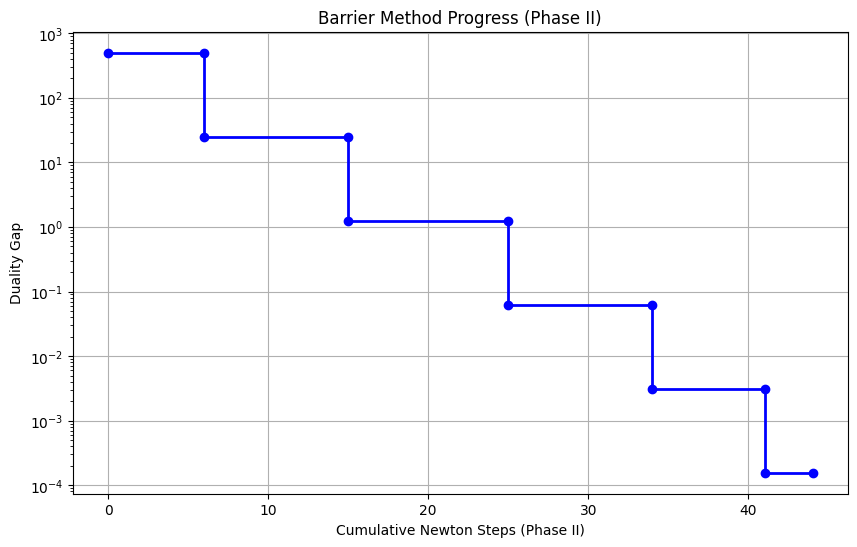

In [26]:
# additional exercise
# (3) LP solver

import numpy as np
import matplotlib.pyplot as plt

m = 100
n = 500
alpha = 0.01
beta = 0.5
tol_acent = 1e-6
tol_barrier = 1e-3
Maxiter = 100

np.random.seed(0)
A = np.vstack([np.random.randn(m-1, n), np.ones((1, n))])
x_true = np.random.rand(n) + 0.1
b = A @ x_true
c = np.random.randn(n)

print("="*60)
print("Phase I")
print("="*60)

# Phase I problem
x0 = np.linalg.lstsq(A, b, rcond=None)[0]
t0 = max(2 - np.min(x0), 0.1)

A1 = np.hstack([A, -A @ np.ones((n, 1))])
b1 = b - A @ np.ones(n)
c1 = np.hstack([np.zeros(n), 1])

z0 = x0 + t0 * np.ones(n) - np.ones(n)
x1 = np.hstack([z0, t0])
x1 = np.maximum(x1, 0.1)

# Phase I barrier method
t_bar = 1.0
mu = 20.0
phase1_steps = 0

while True:
    c_bar = t_bar * c1
    newton_iter = 0
    
    while newton_iter < Maxiter:
        g = c_bar - 1/x1
        H_inv = np.diag(x1 ** 2)
        
        w = -np.linalg.solve(A1 @ H_inv @ A1.T, A1 @ H_inv @ g)
        dx = -H_inv @ (A1.T @ w + g)
        
        lambsqr = -float(g.T @ dx)
        if lambsqr / 2 <= tol_acent:
            break
        
        s = 1.0
        while np.min(x1 + s*dx) <= 0:
            s *= beta
        
        while (c_bar.T @ (s*dx) - np.sum(np.log(x1 + s*dx)) + 
               np.sum(np.log(x1)) - alpha * s * (g.T @ dx) > 0):
            s *= beta
            
        x1 = x1 + s*dx
        newton_iter += 1
    
    phase1_steps += newton_iter
    gap1 = (n + 1) / t_bar
    
    if gap1 < tol_barrier:
        break
    
    t_bar = mu * t_bar

t_star = x1[-1]
print(f"Phase I: t* = {t_star:.6f}, Newton steps = {phase1_steps}")

if t_star >= 1:
    print("\n" + "="*60)
    print("INFEASIBLE")
    print("="*60)
else:
    print("\n" + "="*60)
    print("Phase II: Solving LP")
    print("="*60)
    
    z_star = x1[:-1]
    x = z_star - t_star * np.ones(n) + np.ones(n)
    x = np.maximum(x, 0.01)
    
    # Phase II barrier method
    t_bar = 1.0
    history = []
    
    while True:
        c_bar = t_bar * c
        newton_iter = 0
        
        while newton_iter < Maxiter:
            g = c_bar - 1/x
            H_inv = np.diag(x ** 2)
            
            w = -np.linalg.solve(A @ H_inv @ A.T, A @ H_inv @ g)
            dx = -H_inv @ (A.T @ w + g)
            
            lambsqr = -float(g.T @ dx)
            if lambsqr / 2 <= tol_acent:
                break
            
            s = 1.0
            while np.min(x + s*dx) <= 0:
                s *= beta
            
            while (c_bar.T @ (s*dx) - np.sum(np.log(x + s*dx)) + 
                   np.sum(np.log(x)) - alpha * s * (g.T @ dx) > 0):
                s *= beta
                
            x = x + s*dx
            newton_iter += 1
        
        gap = n / t_bar
        history.append([newton_iter, gap])
        
        if gap < tol_barrier:
            break
        
        t_bar = mu * t_bar
    
    history = np.array(history).T
    p_star = c.T @ x
    
    print(f"Phase II Newton steps: {int(np.sum(history[0, :]))}")
    print(f"Optimal value: {p_star:.6f}")
    print(f"Duality gap: {gap:.6e}")
    
    # Plot
    plt.figure(figsize=(10, 6))
    cumsum_steps = np.cumsum(history[0, :])
    gaps = history[1, :]
    
    xx = [0]
    yy = [gaps[0]]
    for i in range(len(cumsum_steps)):
        xx.append(cumsum_steps[i])
        yy.append(gaps[i])
        if i < len(cumsum_steps) - 1:
            xx.append(cumsum_steps[i])
            yy.append(gaps[i+1])
    
    plt.semilogy(xx, yy, 'bo-')
    plt.xlabel('Newton Steps')
    plt.ylabel('Duality Gap')
    plt.grid(True)
    plt.show()